In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import stats
import tessutils
from lightkurve import BoxLeastSquaresPeriodogram as BLS
from astropy.io import fits

In [2]:
folderName = 'tess2018206045859-s0001-0000000092352620-0120-s'
downloadDir = 'CleanPath/LowMags/TIC_92352620/' #Path must flow like this
#downloadDir = 'CleanPath/LowMags/TIC_38846515/' #To test another target
gifDir = 'CleanPath/LowMags/TIC_92352620/gifs'
#epicDir = 'CleanPath'
#folderName2 = 'ktwo201637175-c01_llc'

lc_load, sectors = tessutils.loadLC(folderName, downloadDir, fluxType="PDCSAP", normalised=True)
lcOri = lc_load.copy()
#lc_epic, sectors = tessutils.loadLC(folderName2, epicDir, fluxType="PDCSAP", normalised=True)

D:\Python\Anaconda\lib\site-packages\lightkurve\lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


In [19]:
plt.rc('font', family="Times New Roman")
plt.rc('font', size=12)

In [53]:
#testy = fits.open('ktwo201637175-c01_llc.fits')
#testy[2].header

In [3]:
bls = BLS.from_lightcurve(lc_load)
period = bls.period_at_max_power
period_bls = period.value
dur = bls.duration_at_max_power
dur_bls = dur.value
print(period_bls)
phase_bls = (lc_load.time % period_bls) / period_bls
print(dur_bls)

3.9529424305734286
0.25


In [4]:
def gridfreq(lc, N=50):
    time = max(lc_load.time)-min(lc_load.time)
    for i in np.arange(1/6, 1/2, (1/time * 1/N)):
        period = 1/i
        phase = (lc.time % period) / period
        plt.scatter(phase, (lcTransit.flux-1.), marker=".", color="k", s=3)
        plt.xlim(0,1)
        plt.title("TOI 107.01 folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux")
        #plt.savefig(os.path.join(gifDir,"PhaseFold_gif{}.png".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
        plt.show()

In [5]:
#gridfreq(lc_load)
#My first nice gif: 2.989 days to 5.92 days

In [5]:
def gridfreq_col(lc, N=50):
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/6, 1/2, (1/time * 1/N)):
        period = 1/i
        phase = (lc.time % period) / period
        
        mad = stats.median_absolute_deviation(lc_load.flux) 
        col = ['k']*len(phase)
        col = np.array(col)
        col[np.where(lc.flux-1 >= 4*mad)] = 'blue'
        col[np.where(lc.flux-1 <= -4*mad)] = 'r'
        
        plt.scatter(phase, (lc.flux-1.), marker=".", color=col, s=3)
        plt.xlim(0,1)
        plt.title("TOI 107.01 folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux")
        #plt.savefig(os.path.join(gifDir,"PhaseFold_col_gif{}.png".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
        plt.show()

In [7]:
#gridfreq_col(lc_load)

In [73]:
def gridfreq_col2(lc, N=5): #Big gif: N=5
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/2.8, (1/time * 1/N)): #Big gif: 1/6, 1/2
        period = 1/i
        phase = (lc.time % period) / period
        
        mad = stats.median_absolute_deviation(lc_load.flux) 
        col = ['k']*len(phase)
        col = np.array(col)
        col[np.where(lc.flux-1 >= 4*mad)] = 'k'
        col[np.where(lc.flux-1 <= -4*mad)] = 'r'
        
        flux_mad = np.where(lc.flux-1 > 4*mad, 0, lc.flux-1)
        
        plt.scatter(phase, flux_mad, marker=".", color=col, s=3)
        plt.xlim(0,1)
        plt.title("TOI 107.01 folded at {} days".format('%.2f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux")
        plt.savefig(os.path.join(gifDir,"rep_PhaseFold_col_nopos_gif{}.pdf".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
        plt.show()

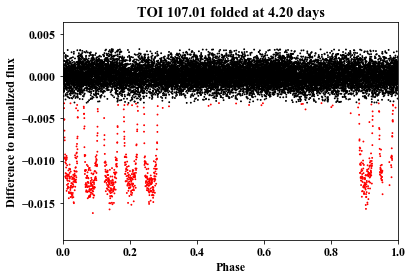

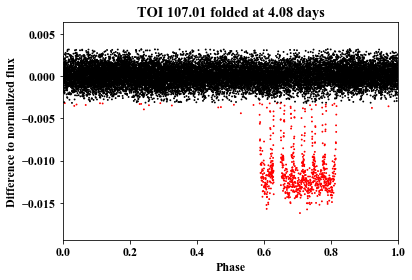

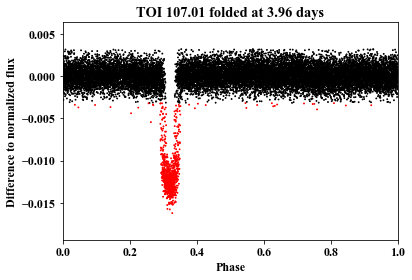

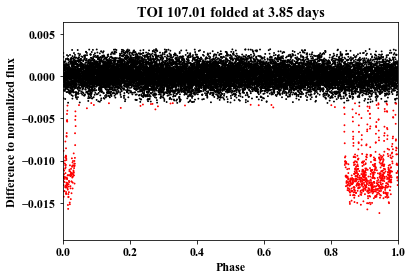

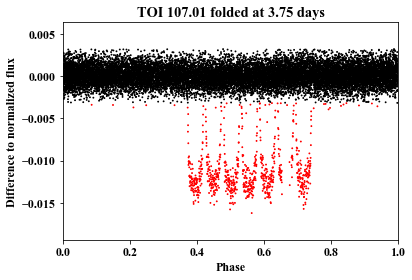

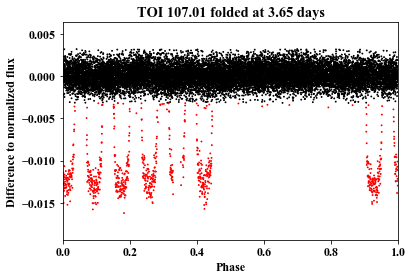

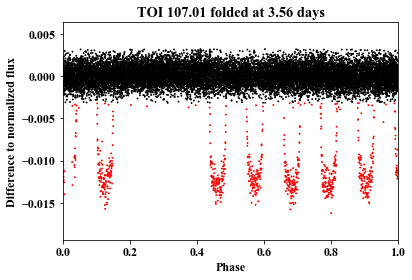

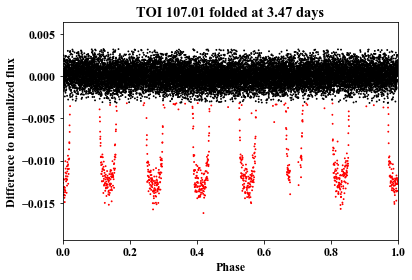

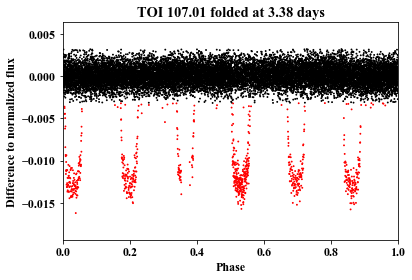

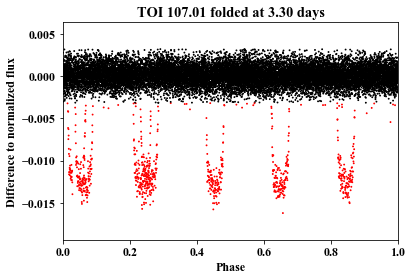

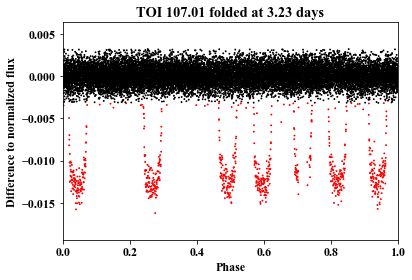

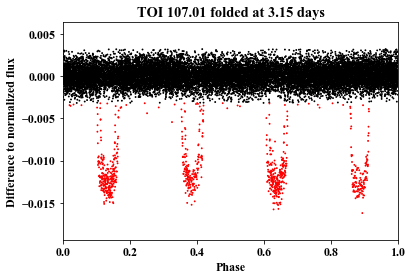

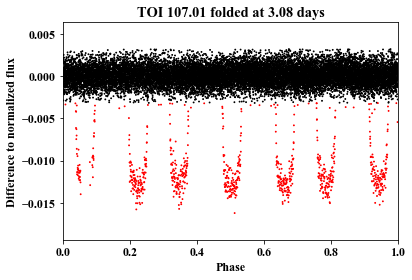

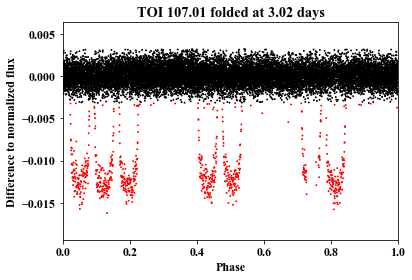

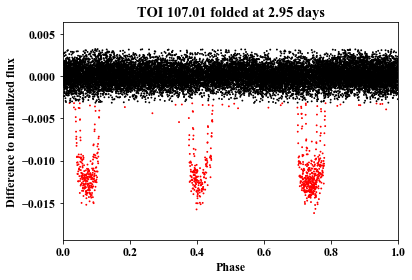

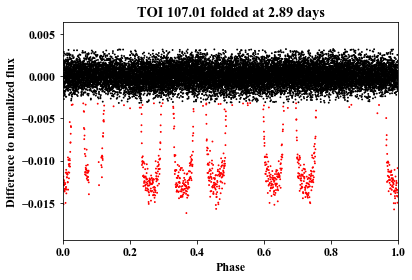

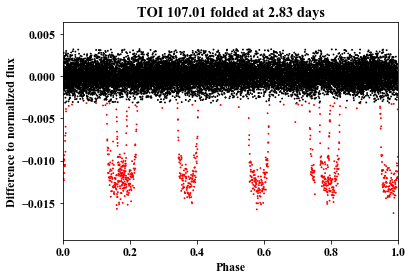

In [74]:
gridfreq_col2(lc_load)

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


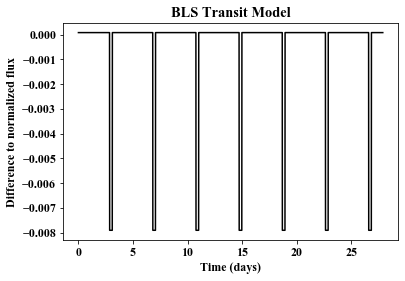

In [27]:
N=12
lcTransit = lc_load.copy()
test = BLS.from_lightcurve(lcTransit)
model = BLS.get_transit_model(test)
time = max(model.time)-min(model.time)
#period = 1/i
period = period_bls
phase = (lc_load.time % period)
plt.plot(lc_load.time-lc_load.time[0], model.flux-1, c='k')
#plt.title("BLS Transit Model at {} days".format('%.3f'%(period)))
plt.title("BLS Transit Model")
plt.xlabel("Time (days)")
plt.ylabel("Difference to normalized flux")
plt.savefig(os.path.join(downloadDir,"rep_BLSyay.pdf"), bbox_inches='tight')
plt.show()

In [35]:
def window(a, w=50, o=5):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    return view

In [289]:
def gridfreq_col0(lc):
    time = max(lc.time)-min(lc.time)
    period = 4.19
    phase = (lc.time % period) / period
        
    flux_nomad = lc.flux-1
    MAD = stats.median_absolute_deviation(flux_nomad)
    flux_mad = np.where(lc.flux-1 > 4*mad, 0, lc.flux-1)   
        
    colo = ['k']*len(phase)
    colo = np.array(colo)
    colo[np.where(lc.flux-1 >= 4*mad)] = 'k'
    colo[np.where(lc.flux-1 <= -4*mad)] = 'r'    
        
    ##Counting neg outlier below
    col = [0]*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
    #print(len(col))
    windows = window(col, w=50, o=10)
    window_phase = window(phase, w=50, o=10)
    x=window_phase[:,0]
    counts = []
    for j in range(0, len(windows)):
        outlier_count = np.count_nonzero(windows[j])
        counts.append(outlier_count)
    ##Counting neg outlier above
    #plt.scatter(x, counts, marker="o", color="k", s=3)
    #plt.xlim(0,1)
    #plt.ylim(0,55)
    #plt.show()
    plt.scatter(phase, flux_mad, marker=".", color=colo, s=3)
    #plt.xlim(0.1,.4)
    #phaxis = np.sort(x)
    #start = 390
    #plt.axvline(x=phaxis[start], ymax=0.75, c='blue', linestyle='--')
    #plt.axvline(x=phaxis[start+50], ymax=0.75, c='blue', linestyle='--')
    #plt.axvline(x=phaxis[start+10], ymax=0.75, c='purple', linestyle='--')
    #plt.axvline(x=phaxis[start+50+10], ymax=0.75, c='purple', linestyle='--')
    #plt.axvline(x=phaxis[start+20], ymax=0.75, c='green', linestyle='--')
    #plt.axvline(x=phaxis[start+50+10+10], ymax=0.75, c='green', linestyle='--')
    plt.title("TOI 107.01 folded at {} days".format('%.2f'%(period)))
    plt.xlabel("Phase")
    plt.ylabel("Difference to normalized flux")
    #plt.savefig(os.path.join(downloadDir,"NiceyFold{}.png".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
    plt.show()

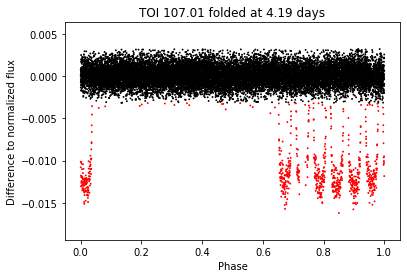

In [290]:
#gridfreq_col0(lc_load)

In [89]:
def gridfreqcount(lc, upper=4.1, lower=3.8, N=5):
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/upper, 1/lower, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=50, o=10)
        window_phase = window(phase, w=50, o=10)
        x=window_phase[:,0]
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        plt.scatter(x, counts, marker="o", color="k", s=3)
        plt.xlim(0,1)
        plt.ylim(0,55)
        plt.title("Counting Negative Outliers at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Outlier Count")
        #plt.savefig(os.path.join(gifDir,"NegCount_gif{}.png".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
        plt.show()

In [93]:
#gridfreqcount(lc_load)

In [49]:
def gridfreqcount2(lc):
    time = max(lc.time)-min(lc.time)
    period = 4.19
    phase = (lc.time % period) / period
        
    flux_nomad = lc.flux-1
    MAD = stats.median_absolute_deviation(flux_nomad)
        
    ##Counting neg outlier below
    col = [0]*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
    #print(len(col))
    windows = window(col, w=50, o=10)
    window_phase = window(phase, w=50, o=10)
    x=window_phase[:,0]
    counts = []
    for j in range(0, len(windows)):
        outlier_count = np.count_nonzero(windows[j])
        counts.append(outlier_count)
    ##Counting neg outlier above
    plt.scatter(x, counts, marker="o", color="k", s=3)
    plt.xlim(0,1)
    plt.ylim(0,55)
    plt.title("Counting Negative Outliers at {} days".format('%.2f'%(period)))
    plt.xlabel("Phase")
    plt.ylabel("Outlier Count")
    plt.savefig(os.path.join(downloadDir,"rep_NegCount{}.pdf".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
    plt.show()

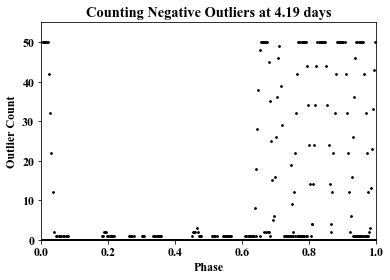

In [50]:
gridfreqcount2(lc_load)

In [37]:
def countcdf(lc,N=5):
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/2.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period) / period
        flux_nomad = lc.flux-1
        
        ##Counting neg outlier below
        MAD = stats.median_absolute_deviation(flux_nomad)
        #flux_mad = np.where(flux_nomad > 4*MAD, 0, flux_nomad)
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        windows = window(col, w=100, o=10)
        window_phase = window(phase, w=100, o=10)
        windows_new = window(flux_nomad, w=100, o=10)
        xphase = window_phase[:,0]
        xs = np.sort(xphase)
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        ##CDF below
        index = np.argsort(xphase)
        counts_new = np.array(counts)
        counts_new = counts_new[index]
        counts_cdf = np.cumsum(counts_new)
        #n = len(counts_cdf)
        #y4 = np.arange(1,n+1)/n
        y = counts_cdf/counts_cdf[-1]
        ##CDF above
        
        ###Determining middle
        middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
        #print('y midpoint = ' + str(middle))
        midindex = list(y).index(middle)
        #print('x value at y midpoint = ' + str(xs[midindex]))
        phase_shift = xs - xs[midindex]
        y_shift = y.copy()
        for j in range (0, len(phase_shift)):
            if phase_shift[j] < -0.5:
                phase_shift[j] = phase_shift[j]+1
                y_shift[j] = 1
            if phase_shift[j] > 0.5:
                phase_shift[j] = phase_shift[j]-1
                y_shift[j] = 0
            else:
                phase_shift[j]=phase_shift[j]
                y_shift[j] = y_shift[j]
        ###Determining middle
        plt.scatter(phase_shift, y_shift, marker=".", color="k", s=3)
        plt.xlim(-0.5,0.5)
        plt.ylim(-0.1,1.1)
        plt.title("Cumulative Sum of Negative Outliers at {} days".format('%.3f'%(period)))
        plt.ylabel("Normalized Cumulative Sum")
        plt.xlabel("Shifted Phase")
        #plt.savefig(os.path.join(gifDir,"ShiftedCDF_gif{}.png".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
        plt.show()

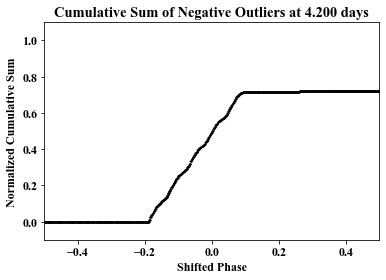

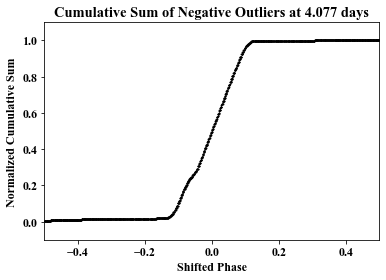

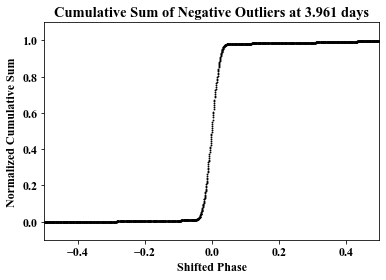

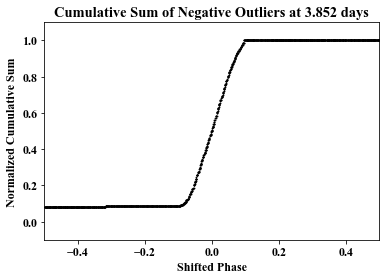

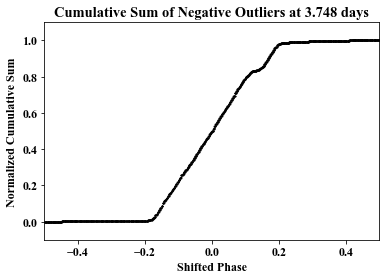

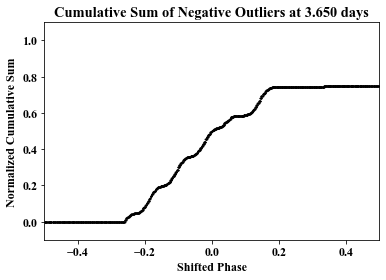

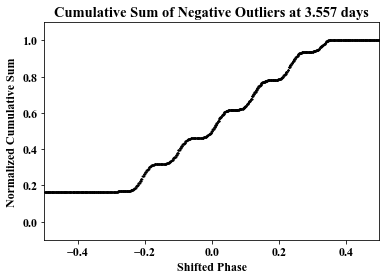

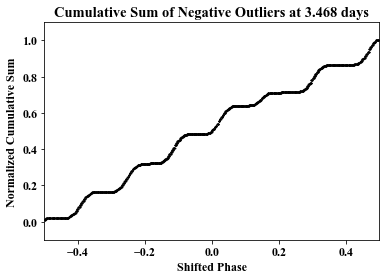

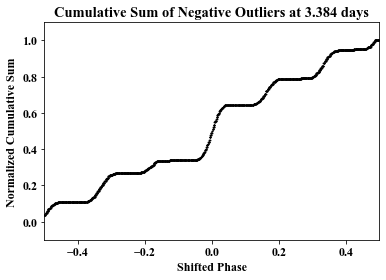

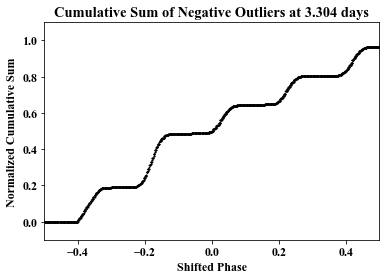

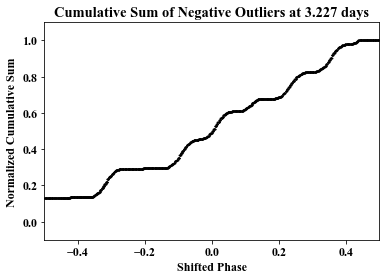

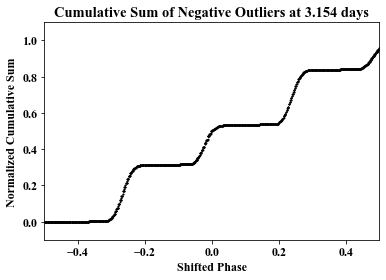

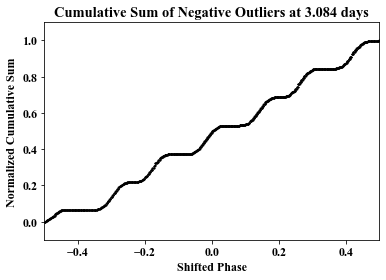

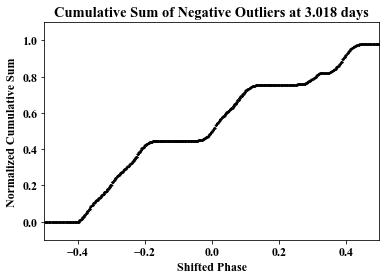

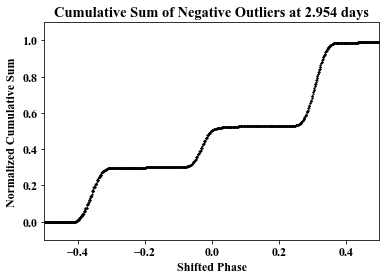

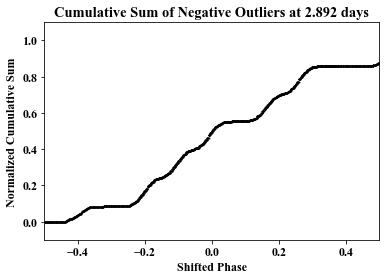

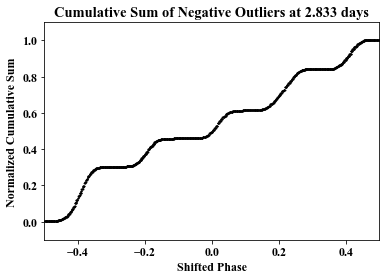

In [38]:
countcdf(lc_load)

In [85]:
def countcdf2(lc):
    time = max(lc.time)-min(lc.time)
    period = 3.95
    period2 = 4.19
    phase = (lc.time % period) / period
    phase2 = (lc.time % period2) / period2
    flux_nomad = lc.flux-1
        
    ##Counting neg outlier below
    MAD = stats.median_absolute_deviation(flux_nomad)
    #flux_mad = np.where(flux_nomad > 4*MAD, 0, flux_nomad)
    col = [0]*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
    windows = window(col, w=100, o=10)
    window_phase = window(phase, w=100, o=10)
    windows_new = window(flux_nomad, w=100, o=10)
    xphase = window_phase[:,0]
    xs = np.sort(xphase)
    counts = []
    for j in range(0, len(windows)):
        outlier_count = np.count_nonzero(windows[j])
        counts.append(outlier_count)
    ##Counting neg outlier above
        
    ##CDF below
    index = np.argsort(xphase)
    counts_new = np.array(counts)
    counts_new = counts_new[index]
    counts_cdf = np.cumsum(counts_new)
    #n = len(counts_cdf)
    #y4 = np.arange(1,n+1)/n
    y = counts_cdf/counts_cdf[-1]
    ##CDF above
        
    ###Determining middle
    middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
    #print('y midpoint = ' + str(middle))
    midindex = list(y).index(middle)
    #print('x value at y midpoint = ' + str(xs[midindex]))
    phase_shift = xs - xs[midindex]
    y_shift = y.copy()
    for j in range (0, len(phase_shift)):
        if phase_shift[j] < -0.5:
            phase_shift[j] = phase_shift[j]+1
            y_shift[j] = 1
        if phase_shift[j] > 0.5:
            phase_shift[j] = phase_shift[j]-1
            y_shift[j] = 0
        else:
            phase_shift[j]=phase_shift[j]
            y_shift[j] = y_shift[j]
    ###Determining middle
    plt.scatter(phase_shift, y_shift, marker=".", color="k", s=3)
    plt.plot(np.unique(phase_shift), np.poly1d(np.polyfit(phase_shift, y_shift, 1))(np.unique(phase_shift)))
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.1,1.1)
    plt.title("Cumulative Sum of Negative Outliers at {} days".format('%.2f'%(period)))
    plt.ylabel("Normalized Cumulative Sum")
    plt.xlabel("Shifted Phase")
    #plt.savefig(os.path.join(downloadDir,"rep_ShiftedCDF{}.pdf".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
    plt.show()

<IPython.core.display.Javascript object>


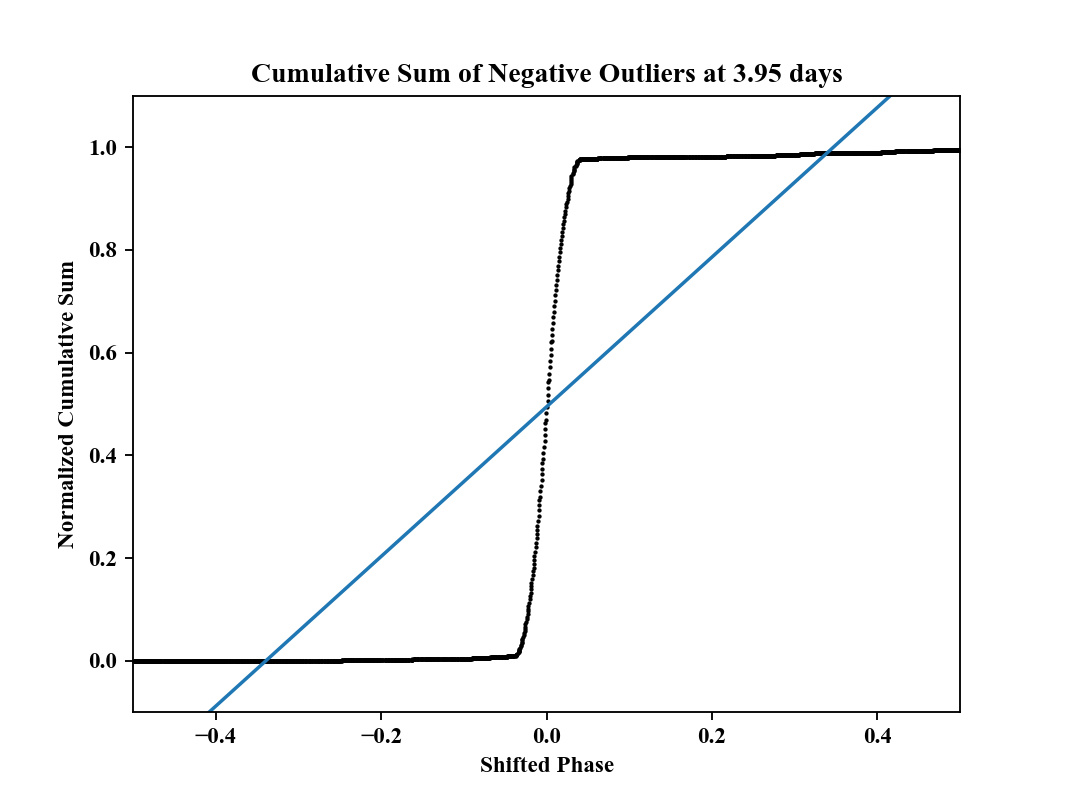

In [88]:
#%matplotlib notebook
countcdf2(lc_load)

In [81]:
def plotlc(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])  
    flux_nomad = lc.flux-1

    plt.scatter(time, flux_nomad, marker=".", c='k', s=3)
    plt.ylim(-0.019,0.011)
    plt.xlim(0, tottime)
    plt.title("TOI 107.01 Light Curve")
    plt.xlabel("Time (days)")
    plt.ylabel("Difference to normalized flux")
    plt.savefig(os.path.join(gifDir,"rep_NiceLC.pdf"), bbox_inches='tight', dpi=500)
    plt.show()

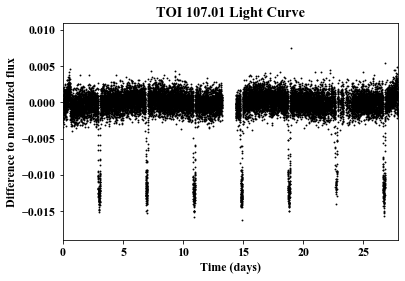

In [82]:
plotlc(lc_load)

In [331]:
def plotbox(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])  
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    dur = bls.duration_at_max_power
    dur = dur.value
    phase = (lc.time % period) / period
    flux_nomad = lc.flux-1
    
    number_of_trans = int(np.ceil(tottime/period))

    model = BLS.get_transit_model(bls)
    model.time = model.time-model.time[0]
    firsttrans_ind = np.where(model.flux == min(model.flux))[0]
    firsttrans = firsttrans_ind[0]
    #const = period - time[2002] #Works for TIC9235... 
    const = period - time[firsttrans]
    
    #plt.scatter(time, flux_nomad, marker=".", c='k', s=3)
    plt.scatter(model.time, model.flux-1, marker=".", c='b', s=3)
    for k in range (1, number_of_trans):
        trans_start = (k*period)-const
        trans_end = (k*period)-const + (dur)
        #plt.axvline(x=(k*period)-const, ymin=0.1, ymax=0.55, c='red', linestyle='--')
        #plt.axvline(x=(k*period)-const + (dur), ymin=0.1, ymax=0.55, c='red', linestyle='--')
    plt.ylim(-0.019,0.011)
    plt.xlim(0, tottime)
    plt.title("TOI 107.01 Light Curve")
    plt.xlabel("Time (days)")
    plt.ylabel("Difference to normalized flux")
    #plt.savefig(os.path.join(gifDir,"NiceLC.png"), bbox_inches='tight', dpi=500)
    plt.show()

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


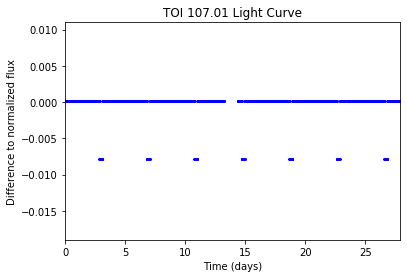

In [332]:
#plotbox(lc_load)

In [79]:
#%matplotlib notebook
def phasefold4(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    dur = bls.duration_at_max_power
    dur = dur.value
    phase = (lc.time % period) / period
    
    flux_nomad = lc.flux-1
    mad = stats.median_absolute_deviation(lc.flux)
    std = np.std(flux_nomad)
         
    col = ['k']*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad >= 4*mad)] = 'cyan'
    col[np.where(flux_nomad <= -4*mad)] = 'r'
    ind_norm = np.where(col == 'k')
    ind_outl_pos = np.where(col == 'cyan')
    ind_outl_neg = np.where(col == 'r')
    
    number_of_trans = int(np.ceil(tottime/period))

    model = BLS.get_transit_model(bls)
    model.time = model.time-model.time[0]
    firsttrans_ind = np.where(model.flux == min(model.flux))[0]
    firsttrans = firsttrans_ind[0]
    #const = period - time[2002] #Works for TIC9235... 
    const = period - time[firsttrans]
    
    for k in range (1, number_of_trans):
        trans_start = (k*period)-const
        trans_end = (k*period)-const + (dur)
        #plt.axvline(x=(k*period)-const, c='gray', linestyle='--')
        #plt.axvline(x=(k*period)-const + (dur), c='gray', linestyle='--')
        for j in range (0, len(time)):
            if trans_start < time[j] and time[j] < trans_end:
                flux_nomad[j]=0
            else:
                flux_nomad[j]=flux_nomad[j]
        flux_notrans = flux_nomad
    
    #flux_notrans = np.where(flux_notrans >= 4*mad, 0, flux_notrans)
    
    plt.scatter(time, flux_notrans, marker=".", color='k', s=3)
    plt.ylim(-0.019,0.011)
    plt.xlim(0, tottime)
    plt.title("TOI 107.01 Light Curve")
    plt.xlabel("Time (days)")
    plt.ylabel("Difference to normalized flux")
    plt.savefig(os.path.join(gifDir,"rep_NiceLC_BLS.pdf"), bbox_inches='tight', dpi=500)
    plt.show()

In [91]:
phasefold4(lc_load)

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


In [30]:
#%matplotlib notebook
def phasefold5(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    dur = bls.duration_at_max_power
    dur = dur.value
    phase = (lc.time % period) / period
    
    flux_nomad = lc.flux-1
    mad = stats.median_absolute_deviation(lc.flux)
    std = np.std(flux_nomad)
         
    col = ['k']*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad >= 4*mad)] = 'blue'
    col[np.where(flux_nomad <= -4*mad)] = 'r'
    ind_norm = np.where(col == 'k')
    ind_outl_pos = np.where(col == 'blue')
    ind_outl_neg = np.where(col == 'r')
    
    number_of_trans = int(np.ceil(tottime/period))

    model = BLS.get_transit_model(bls)
    model.time = model.time-model.time[0]
    firsttrans_ind = np.where(model.flux == min(model.flux))[0]
    firsttrans = firsttrans_ind[0]
    #const = period - time[2002] #Works for TIC9235... 
    const = period - time[firsttrans]
    
    for k in range (1, number_of_trans):
        trans_start = (k*period)-const
        trans_end = (k*period)-const + (dur)
        #plt.axvline(x=(k*period)-const, c='gray', linestyle='--')
        #plt.axvline(x=(k*period)-const + (dur), c='gray', linestyle='--')
        for j in range (0, len(time)):
            if trans_start < time[j] and time[j] < trans_end:
                flux_nomad[j]=0
            else:
                flux_nomad[j]=flux_nomad[j]
        flux_notrans = flux_nomad
    
    #flux_notrans = np.where(flux_notrans >= 4*mad, 0, flux_notrans)
    
    plt.scatter(time, lc.flux-1, marker=".", color=col, s=3)
    plt.ylim(-0.019,0.011)
    plt.xlim(0, tottime)
    plt.title("TOI 107.01 Light Curve")
    plt.xlabel("Time (days)")
    plt.ylabel("Difference to normalized flux")
    plt.savefig(os.path.join(gifDir,"rep_NiceLC_col.pdf"), bbox_inches='tight', dpi=500)
    plt.show()

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


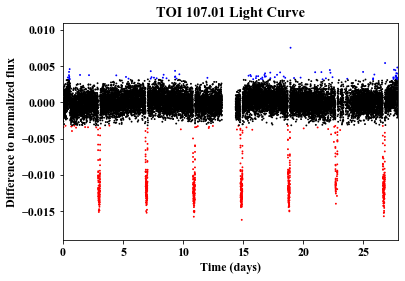

In [31]:
phasefold5(lc_load)

In [89]:
#%matplotlib notebook
def remcum(lc):
    tottime = max(lc.time)-min(lc.time)
    time = (lc.time-lc.time[0])
    bls = BLS.from_lightcurve(lc)
    period = bls.period_at_max_power
    period = period.value
    dur = bls.duration_at_max_power
    dur = dur.value
    phase = (lc.time % period) / period
    
    flux_nomad = lc.flux-1
    mad = stats.median_absolute_deviation(lc.flux)
    std = np.std(flux_nomad)
         
    col = ['k']*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad >= 4*mad)] = 'cyan'
    col[np.where(flux_nomad <= -4*mad)] = 'r'
    ind_norm = np.where(col == 'k')
    ind_outl_pos = np.where(col == 'cyan')
    ind_outl_neg = np.where(col == 'r')
    
    number_of_trans = int(np.ceil(tottime/period))

    model = BLS.get_transit_model(bls)
    model.time = model.time-model.time[0]
    firsttrans_ind = np.where(model.flux == min(model.flux))[0]
    firsttrans = firsttrans_ind[0]
    #const = period - time[2002] #Works for TIC9235... 
    const = period - time[firsttrans]
    
    for k in range (1, number_of_trans):
        trans_start = (k*period)-const
        trans_end = (k*period)-const + (dur)
        #plt.axvline(x=(k*period)-const, c='gray', linestyle='--')
        #plt.axvline(x=(k*period)-const + (dur), c='gray', linestyle='--')
        for j in range (0, len(time)):
            if trans_start < time[j] and time[j] < trans_end:
                flux_nomad[j]=0
            else:
                flux_nomad[j]=flux_nomad[j]
        flux_notrans = flux_nomad
        
    ##Counting neg outlier below
    MAD = stats.median_absolute_deviation(flux_nomad)
    #flux_mad = np.where(flux_nomad > 4*MAD, 0, flux_nomad)
    col = [0]*len(phase)
    col = np.array(col)
    col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
    windows = window(col, w=100, o=10)
    window_phase = window(phase, w=100, o=10)
    windows_new = window(flux_nomad, w=100, o=10)
    xphase = window_phase[:,0]
    xs = np.sort(xphase)
    counts = []
    for j in range(0, len(windows)):
        outlier_count = np.count_nonzero(windows[j])
        counts.append(outlier_count)
    ##Counting neg outlier above
        
    ##CDF below
    index = np.argsort(xphase)
    counts_new = np.array(counts)
    counts_new = counts_new[index]
    counts_cdf = np.cumsum(counts_new)
    #n = len(counts_cdf)
    #y4 = np.arange(1,n+1)/n
    y = counts_cdf/counts_cdf[-1]
    ##CDF above
        
    ###Determining middle
    middle = min(y, key=lambda x: abs(x - 0.5)) #Finds the element of the y array closest to 0.5
    #print('y midpoint = ' + str(middle))
    midindex = list(y).index(middle)
    #print('x value at y midpoint = ' + str(xs[midindex]))
    phase_shift = xs - xs[midindex]
    y_shift = y.copy()
    for j in range (0, len(phase_shift)):
        if phase_shift[j] < -0.5:
            phase_shift[j] = phase_shift[j]+1
            y_shift[j] = 1
        if phase_shift[j] > 0.5:
            phase_shift[j] = phase_shift[j]-1
            y_shift[j] = 0
        else:
            phase_shift[j]=phase_shift[j]
            y_shift[j] = y_shift[j]
    ###Determining middle
    plt.scatter(phase_shift, y_shift, marker=".", color="k", s=3)
    plt.plot(np.unique(phase_shift), np.poly1d(np.polyfit(phase_shift, y_shift, 1))(np.unique(phase_shift)))
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.1,1.1)
    plt.title("Cumulative Sum of Negative Outliers at {} days".format('%.2f'%(period)))
    plt.ylabel("Normalized Cumulative Sum")
    plt.xlabel("Shifted Phase")
    #plt.savefig(os.path.join(downloadDir,"rep_ShiftedCDF{}.pdf".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
    plt.show()

No period specified. Using period at max power
No duration specified. Using duration at max power
No transit time specified. Using transit time at max power


<IPython.core.display.Javascript object>


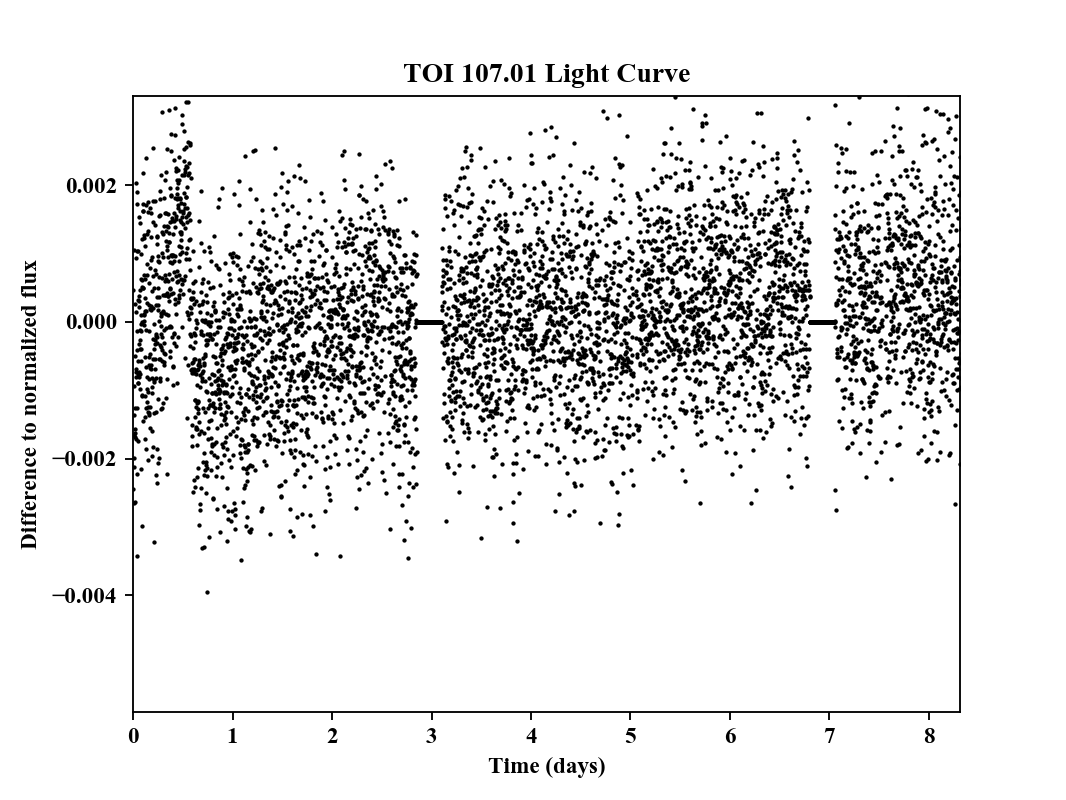

In [90]:
remcum(lc_load)

In [21]:
def phasefold(lc, N=50):
    time = max(lc_load.time)-min(lc_load.time)
    for i in np.arange(1/6, 1/2, (1/time * 1/N)):
        period = 1/i
        phase = (lc.time % period) / period
        plt.scatter(phase, (lcTransit.flux-1.), marker=".", color="k", s=3)
        plt.xlim(0,1)
        plt.title("TOI 107.01 folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux")
        #plt.savefig(os.path.join(gifDir,"PhaseFold_gif{}.png".format('%.4f'%(period))), bbox_inches='tight', dpi=500)
        plt.show()

Text(0, 0.5, 'Difference to normalized flux')

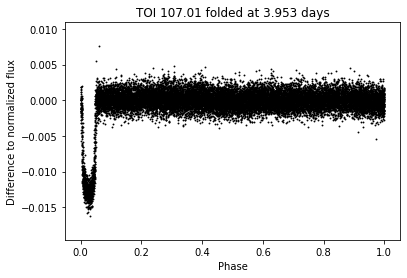

In [22]:
plt.scatter(phase_bls, lc_load.flux-1, marker=".", color="k", s=3)
plt.title("TOI 107.01 folded at {} days".format('%.3f'%(period_bls)))
plt.xlabel("Phase")
plt.ylabel("Difference to normalized flux")
#plt.savefig(os.path.join(gifDir,"NiceLC_fold.png"), bbox_inches='tight', dpi=500)

Text(0, 0.5, 'Difference to normalized flux')

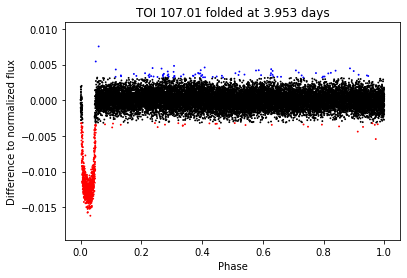

In [23]:
mad = stats.median_absolute_deviation(lc_load.flux) 
col = ['k']*len(phase_bls)
col = np.array(col)
col[np.where(lc_load.flux-1 >= 4*mad)] = 'blue'
col[np.where(lc_load.flux-1 <= -4*mad)] = 'r'
plt.scatter(phase_bls, lc_load.flux-1, marker=".", color=col, s=3)
plt.title("TOI 107.01 folded at {} days".format('%.3f'%(period_bls)))
plt.xlabel("Phase")
plt.ylabel("Difference to normalized flux")
#plt.savefig(os.path.join(gifDir,"NiceLC_fold_col.png"), bbox_inches='tight', dpi=500)